# LIBRARY

In [ ]:
import pandas as pd
#pd.set_option("display.max_columns",100)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from math import sqrt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import accuracy_score ,classification_report , mean_squared_error , mean_absolute_error , confusion_matrix

#DATA

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/hh intern/data/general_data.csv")
data_dict = pd.read_excel("/content/drive/MyDrive/hh intern/data/data_dictionary.xlsx")

In [ ]:
data.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [ ]:
data.head(5)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [ ]:
df_a = data[data["Attrition"]=="Yes"][["EducationField","MonthlyIncome"]]
grp = df_a.groupby("EducationField")
x = []
y = []
for ef in data["EducationField"].unique() :
  if ef != "Other" :
    g = grp.get_group(ef)
    x.append(ef)
    y.append(g["MonthlyIncome"].mean())

In [ ]:
df = data[data["Attrition"]=="No"][["EducationField","MonthlyIncome"]]
grp = df.groupby("EducationField")
x1=[]
y1=[]
for ef in data["EducationField"].unique() :
  if ef != "Other" :  
    g = grp.get_group(ef)
    x1.append(ef)
    y1.append(g["MonthlyIncome"].mean())

In [ ]:
print(x,y)
print(x1,y1)

['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources'] [63211.18811881188, 63507.73333333333, 51316.0, 53174.0, 62174.545454545456]
['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources'] [65731.9603960396, 67788.68894601542, 60470.22388059701, 65581.62393162394, 59269.375]


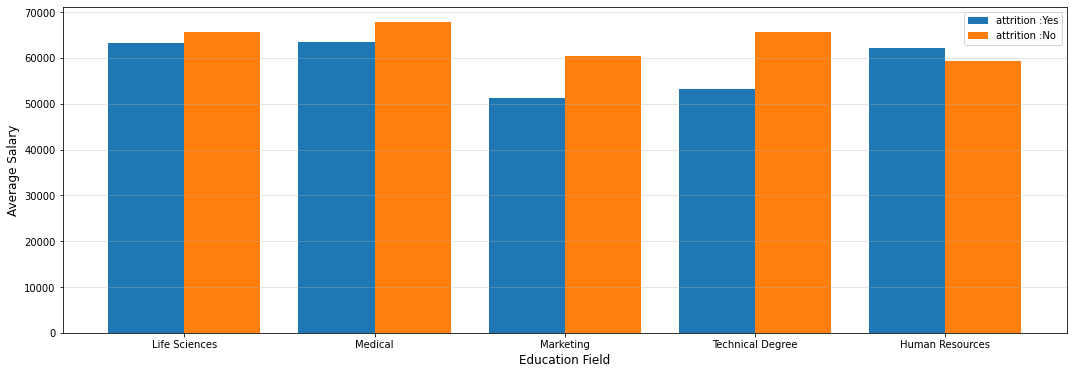

In [ ]:
fig , ax = plt.subplots(1,1,figsize=(18,6))
x_axis = np.arange(len(x1)) 
plt.bar(x_axis-0.2 , y,0.4 , label="attrition :Yes")
plt.bar(x_axis+0.2 , y1,0.4 , label="attrition :No")
plt.xticks(x_axis , x)
plt.legend()
plt.xlabel("Education Field",fontsize=12)
plt.ylabel("Average Salary",fontsize=12)
plt.grid(alpha = 0.4,axis='y')

In [ ]:
columns =  data.columns

In [ ]:
data_dict

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN
5,Education,Education Level,1 'Below College'
6,NaN,NaN,2 'College'
7,NaN,NaN,3 'Bachelor'
8,NaN,NaN,4 'Master'
9,NaN,NaN,5 'Doctor'


In [ ]:
data.describe()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


[Text(0, 0, 'Healthcare Representative'),
 Text(0, 0, 'Research Scientist'),
 Text(0, 0, 'Sales Executive'),
 Text(0, 0, 'Human Resources'),
 Text(0, 0, 'Research Director'),
 Text(0, 0, 'Laboratory Technician'),
 Text(0, 0, 'Manufacturing Director'),
 Text(0, 0, 'Sales Representative'),
 Text(0, 0, 'Manager')]

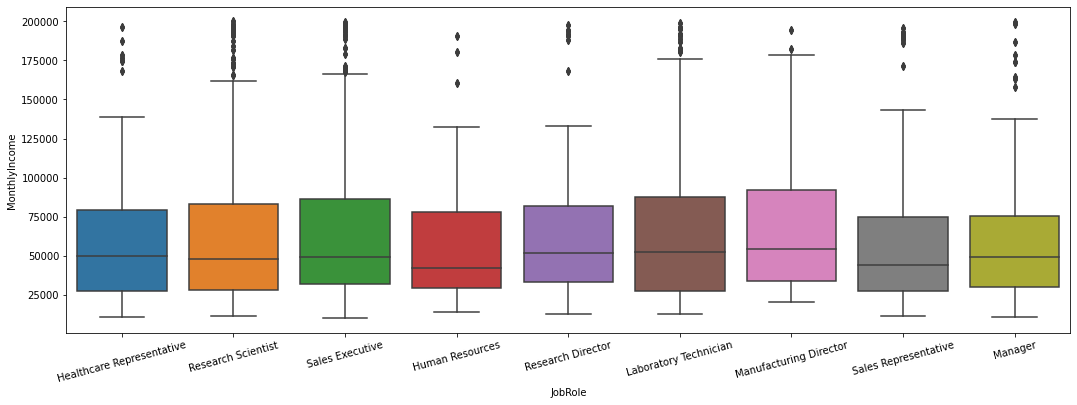

In [ ]:
f , ax = plt.subplots(1,1,figsize=(18,6))

sns.boxplot(y = data.MonthlyIncome	, x = data.JobRole ,ax = ax	)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
positive_attrition = data[data["Attrition"]=="Yes"]



Text(0, 0.5, 'Positive Attrition')

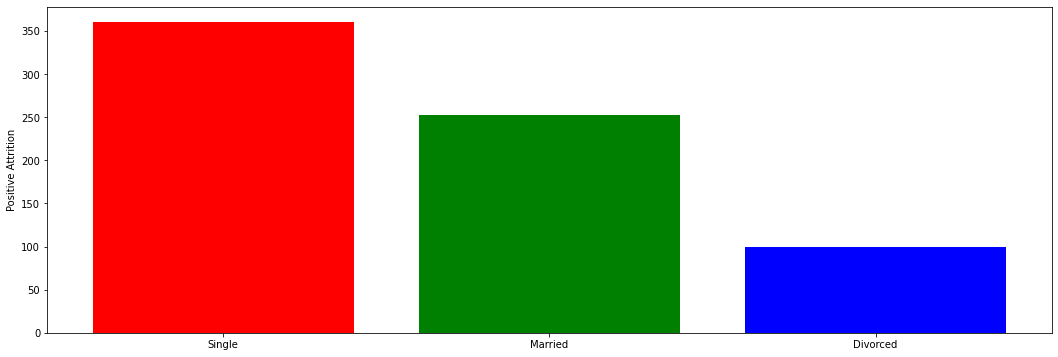

In [ ]:

fi ,ax = plt.subplots(1,1,figsize=(18,6))
ax.bar(["Single","Married","Divorced"] ,[360,252,99], color = ["r","g","b"])
ax.set_ylabel("Positive Attrition")

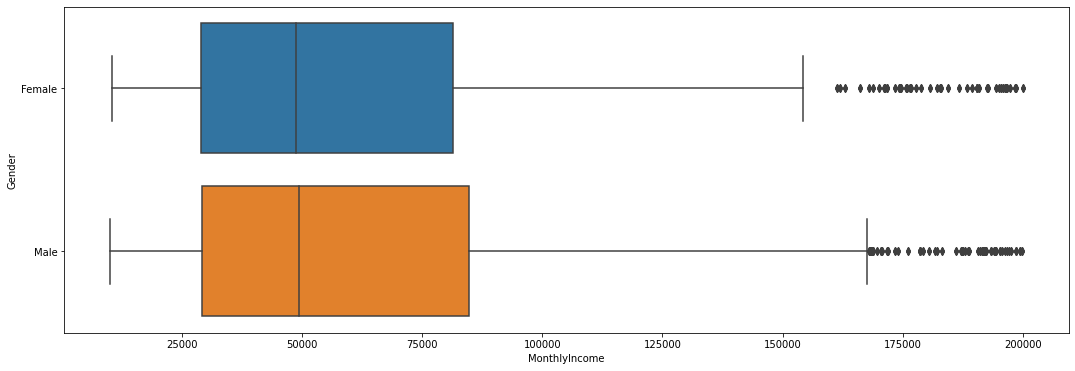

In [ ]:
fig , ax = plt.subplots(1,1 ,figsize=(18,6))
sns.boxplot(y = data.Gender	, x = data.MonthlyIncome ,ax = ax	)


# EXPLORATORY ANALYSIS

## GENDER vs ATTRITION

In [ ]:
total_males = len(data[data["Gender"] == "Male"])
total_females = len(data[data["Gender"] == "Female"])

negative_attrition_male = len( data[ (data["Attrition"]=="No") & (data["Gender"]=="Male") ]  )
negative_attrition_female = len( data[ (data["Attrition"]=="No") & (data["Gender"]=="Female") ]  )
positive_attrition_male = total_males - negative_attrition_male
positive_attrition_female = total_females - negative_attrition_female

In [ ]:
print("total males in company : ",total_males)
print("total_females in company : ",total_females)
print("Male positive attrition : ",positive_attrition_male )
print("Female positive attrition : ",positive_attrition_female)

total males in company :  2646
total_females in company :  1764
Male positive attrition :  441
Female positive attrition :  270


In [ ]:
print("Positive attrition rate for males :",round(positive_attrition_male*100/total_males,2),"%")
print("Positive attrition rate for females :",round(positive_attrition_female*100/total_females,2),"%")

Positive attrition rate for males : 16.67 %
Positive attrition rate for females : 15.31 %


(0.0, 20.0)

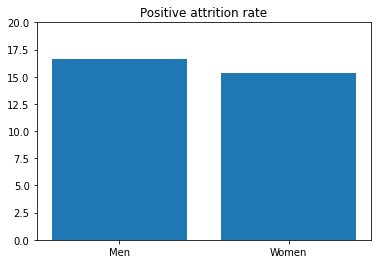

In [ ]:
plt.bar(["Men","Women"],[positive_attrition_male*100/total_males ,
                         positive_attrition_female*100/total_females])
plt.title("Positive attrition rate")

ax= plt.gca() 
ax.set_ylim([0,20])

Does over 18 has any impact

In [ ]:
data["Over18"].unique()
# all are over 18

array(['Y'], dtype=object)

Text(0.5, 0, 'MALE AGE')

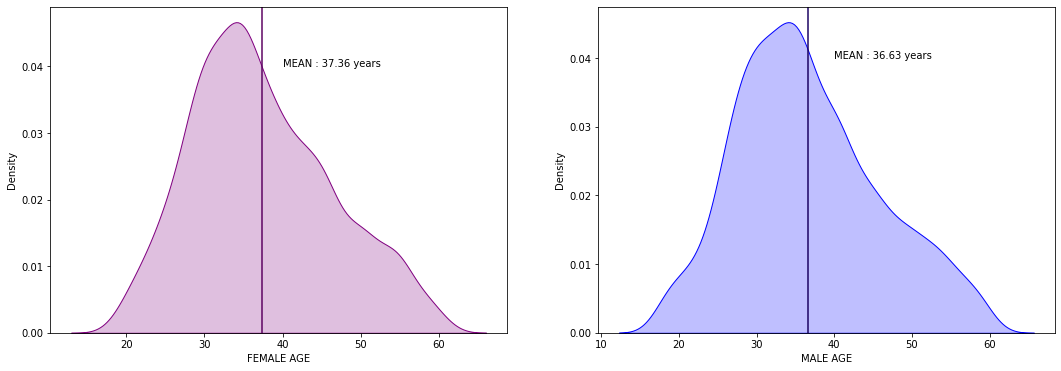

In [ ]:
f ,ax = plt.subplots(1, 2)
f.set_figheight(6)
f.set_figwidth(18)
sns.kdeplot(data[data["Gender"]=="Female"]["Age"],color ="purple",shade = True ,ax = ax[0])
ax[0].axvline(np.mean(data[data["Gender"]=="Female"]["Age"]),color = "#5c0161")
sns.kdeplot(data[data["Gender"]=="Male"]["Age"],color ="Blue",shade = True ,ax = ax[1])
ax[1].axvline(np.mean(data[data["Gender"]=="Male"]["Age"]),color = "#190161")
ax[0].text(40,.04,"MEAN : {} years".format(round(np.mean(data[data["Gender"]=="Female"]["Age"]),2)) ,fontsize = 10)
ax[1].text(40,.04,"MEAN : {} years".format(round(np.mean(data[data["Gender"]=="Male"]["Age"]),2)) ,fontsize = 10)
ax[0].set_xlabel("FEMALE AGE")
ax[1].set_xlabel("MALE AGE")

Text(40, 0.04, 'MEAN : 36.92 years')

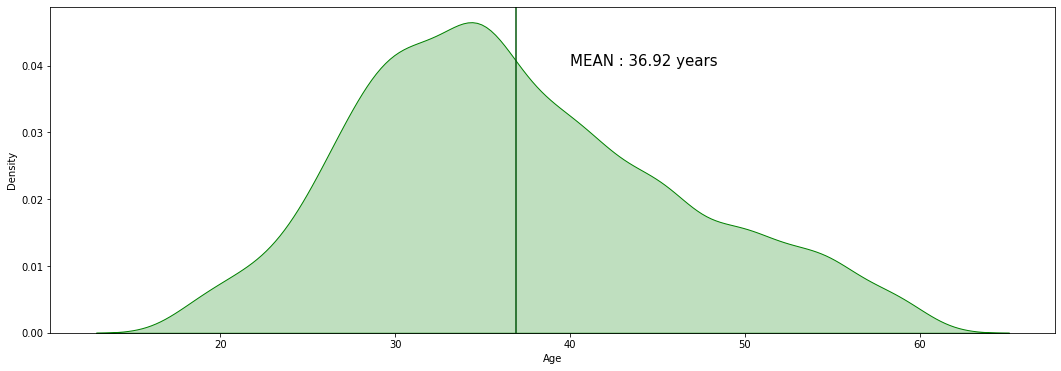

In [ ]:
fig , ax = plt.subplots(1,1 ,figsize=(18,6))

sns.kdeplot(data["Age"],color ="green",shade = True, ax = ax)
ax.axvline(np.mean(data["Age"]),color = "#03570b")
ax.text(40,.04,"MEAN : {} years".format(round(np.mean(data["Age"]),2)) ,fontsize = 15)

Text(0.5, 0, 'Education')

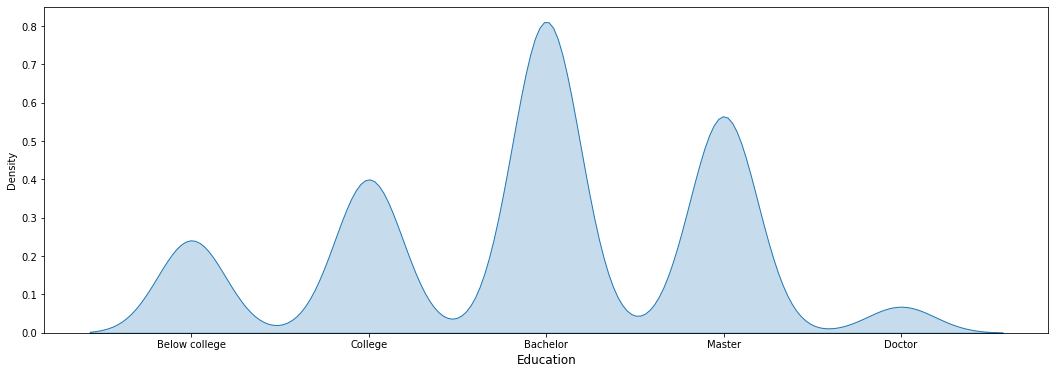

In [ ]:
fig ,ax = plt.subplots(1,1,figsize=(18,6))
sns.kdeplot(data["Education"],shade = True ,ax = ax)
plt.xticks([1,2,3,4,5],["Below college",'College',"Bachelor","Master","Doctor"])
plt.xlabel("Education",fontsize=12)

## Job Satisfaction level vs Attrition

In [ ]:
# 1-> low
# 2-> medium
# 3-> high
# 4->very high

In [ ]:
# data["JobSatisfaction"] = label_encoder.fit_transform(data["JobSatisfaction"])

([<matplotlib.axis.XTick at 0x7f1d761b5750>,
 [Text(0, 0, 'Low'),
  Text(0, 0, 'Medium'),
  Text(0, 0, 'High'),
  Text(0, 0, 'Very high')])

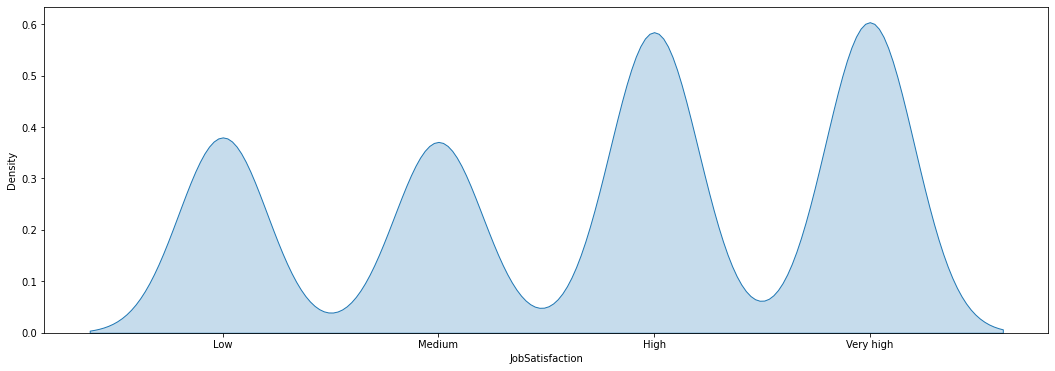

In [ ]:
fig ,ax = plt.subplots(1,1,figsize=(18,6))
sns.kdeplot(data["JobSatisfaction"],shade = True ,ax = ax)
plt.xticks([1,2,3,4],["Low",'Medium',"High","Very high"])


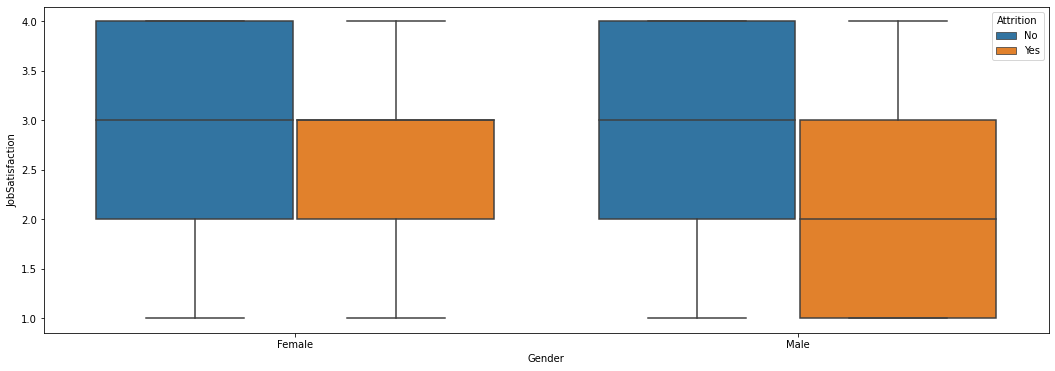

In [ ]:
fig , ax = plt.subplots(1,1,figsize=(18,6))
sns.boxplot(y = data.JobSatisfaction	, x = data.Gender ,hue = data.Attrition	)


In [ ]:
low_satis = len(data[data["JobSatisfaction"]==1])
med_satis = len(data[data["JobSatisfaction"]==2])
high_satis = len(data[data["JobSatisfaction"]==3])
vhigh_satis = len(data[data["JobSatisfaction"]==4])

In [ ]:
print("people with low satisfaction :",low_satis)
print("people with med satisfaction :",med_satis)
print("people with high satisfaction :",high_satis)
print("people with vhigh satisfaction :",vhigh_satis)

people with low satisfaction : 860
people with med satisfaction : 840
people with high satisfaction : 1323
people with vhigh satisfaction : 1367


In [ ]:
low_satis_att = len(positive_attrition[positive_attrition["JobSatisfaction"]==1])
med_satis_att = len(positive_attrition[positive_attrition["JobSatisfaction"]==2])
high_satis_att = len(positive_attrition[positive_attrition["JobSatisfaction"]==3])
vhigh_satis_att = len(positive_attrition[positive_attrition["JobSatisfaction"]==4])

In [ ]:
print("people with low satisfaction and left :",low_satis_att)
print("people with med satisfaction and left :",med_satis_att)
print("people with high satisfaction and left :",high_satis_att)
print("people with vhigh satisfaction and left :",vhigh_satis_att)

people with low satisfaction and left : 197
people with med satisfaction and left : 138
people with high satisfaction and left : 219
people with vhigh satisfaction and left : 156


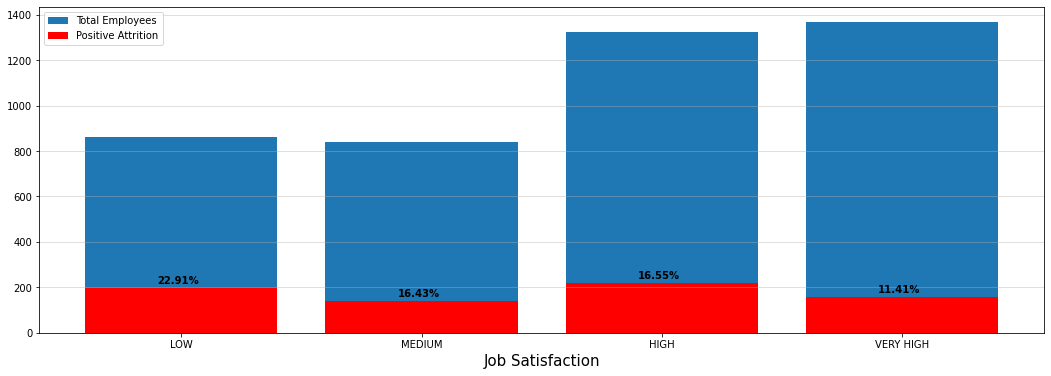

In [ ]:
fig ,ax = plt.subplots(1,1,figsize=(18,6))

ax.bar(["LOW","MEDIUM","HIGH","VERY HIGH"], [low_satis,med_satis,high_satis,vhigh_satis],label="Total Employees")
ax.bar(["LOW","MEDIUM","HIGH","VERY HIGH"], [low_satis_att,med_satis_att,high_satis_att,vhigh_satis_att] ,color= "r",label = "Positive Attrition")


ax.text(-0.1,low_satis_att+20,str(round(low_satis_att*100/low_satis,2))+"%",color="black",fontweight= "bold")
ax.text(1-0.1,med_satis_att+20,str(round(med_satis_att*100/med_satis,2))+"%",color="black",fontweight= "bold")
ax.text(2-0.1,high_satis_att+20,str(round(high_satis_att*100/high_satis,2))+"%",color="black",fontweight= "bold")
ax.text(3-0.1,vhigh_satis_att+20,str(round(vhigh_satis_att*100/vhigh_satis,2))+"%",color="black",fontweight= "bold")
ax.set_xlabel("Job Satisfaction",fontsize=15)
plt.legend()
plt.grid(axis = 'y',alpha = 0.5)

## Work life balance vs Attrition

In [ ]:
# 1-> bad
# 2-> good
# 3-> better
# 4-> best

In [ ]:
low_worklife = len(data[data["WorkLifeBalance"]==1])
med_worklife = len(data[data["WorkLifeBalance"]==2])
high_worklife = len(data[data["WorkLifeBalance"]==3])
vhigh_worklife = len(data[data["WorkLifeBalance"]==4])

In [ ]:
print("people with bad worklife  :",low_worklife)
print("people with good worklife  :",med_worklife)
print("people with better worklife  :",high_worklife)
print("people with best worklife  :",vhigh_worklife)

people with bad worklife  : 239
people with good worklife  : 1019
people with better worklife  : 2660
people with best worklife  : 454


In [ ]:
low_worklife_att = len(positive_attrition[positive_attrition["WorkLifeBalance"]==1])
med_worklife_att = len(positive_attrition[positive_attrition["WorkLifeBalance"]==2])
high_worklife_att = len(positive_attrition[positive_attrition["WorkLifeBalance"]==3])
vhigh_worklife_att = len(positive_attrition[positive_attrition["WorkLifeBalance"]==4])

In [ ]:
print("people with bad worklife and left :",low_worklife_att)
print("people with good worklife and left :",med_worklife_att)
print("people with better worklife and left :",high_worklife_att)
print("people with best worklife and left :",vhigh_worklife_att)

people with bad worklife and left : 75
people with good worklife and left : 171
people with better worklife and left : 380
people with best worklife and left : 81


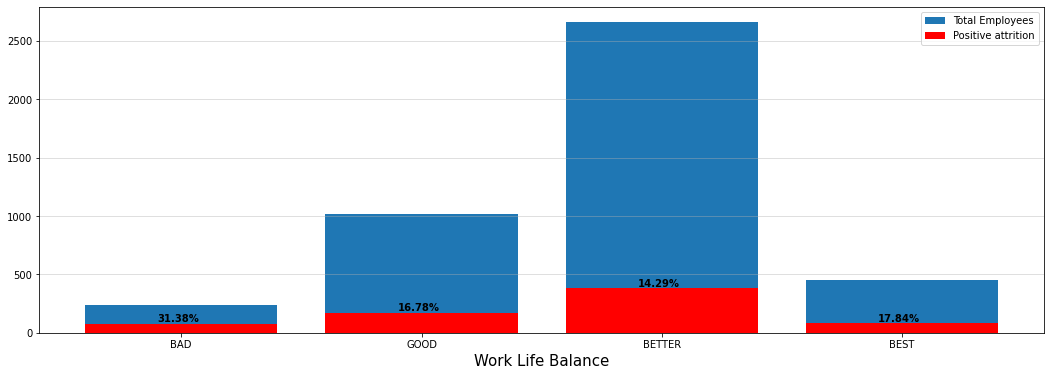

In [ ]:
fig ,ax = plt.subplots(1,1,figsize=(18,6))
ax.bar(["BAD","GOOD","BETTER","BEST"], [low_worklife,med_worklife,high_worklife,vhigh_worklife],label = "Total Employees")
ax.bar(["BAD","GOOD","BETTER","BEST"], [low_worklife_att,med_worklife_att,high_worklife_att,vhigh_worklife_att] ,color= "r",label = "Positive attrition")

ax.text(-0.1,low_worklife_att+20,str(round(low_worklife_att*100/low_worklife,2))+"%",color="black",fontweight= "bold")
ax.text(1-0.1,med_worklife_att+20,str(round(med_worklife_att*100/med_worklife,2))+"%",color="black",fontweight= "bold")
ax.text(2-0.1,high_worklife_att+20,str(round(high_worklife_att*100/high_worklife,2))+"%",color="black",fontweight= "bold")
ax.text(3-0.1,vhigh_worklife_att+20,str(round(vhigh_worklife_att*100/vhigh_worklife,2))+"%",color="black",fontweight= "bold")
ax.set_xlabel("Work Life Balance",fontsize = 15)
plt.legend() 
plt.grid(axis = 'y' ,alpha = 0.5)

## Age vs Attrition

In [ ]:
age = np.array(data["Age"])
num = np.zeros(14)
for a in age :
    k = int((a-18)/3)
    if k == 14 :
        k-=1 
    num[k]+=1  
print(num) 

[ 84. 129. 273. 492. 570. 639. 531. 417. 333. 294. 219. 168. 162.  99.]


Text(0, 0.5, 'Positive Attrition')

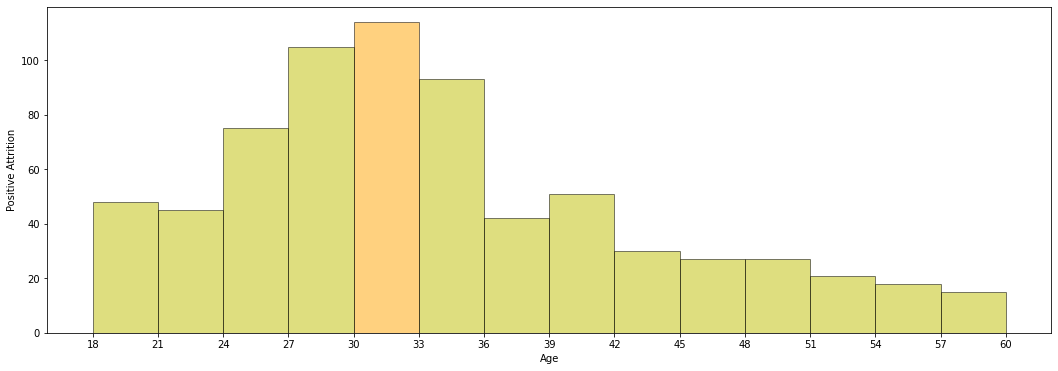

In [ ]:
fig , ax = plt.subplots(1,1,figsize=(18,6))

n , bin,patch = ax.hist(positive_attrition["Age"],bins = np.arange(18,61,3) , color ="y",edgecolor="black",alpha=0.5,linewidth=1)
patch[4].set_fc("orange")
patch[4].set_alpha(0.5)
x = plt.xticks(np.arange(18,61,3))
ax.set_xlabel("Age")
ax.set_ylabel("Positive Attrition")

Text(0, 0.5, 'Positive Attrition rate')

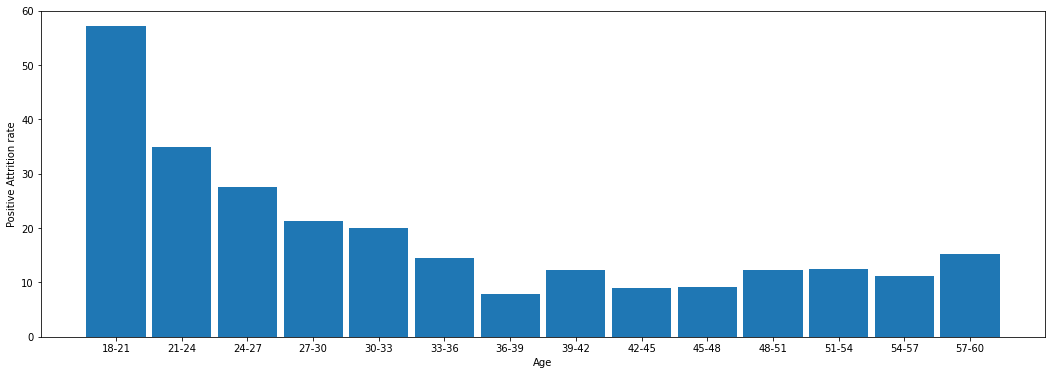

In [ ]:
fig , ax = plt.subplots(1,1,figsize=(18,6))

ax.bar([str(x)+"-"+str(x+3) for x in range(18,60,3) ] ,100*n/num, width= 0.9)
ax.set_xlabel("Age")
ax.set_ylabel("Positive Attrition rate")

# PREDICTIVE ANALYSIS

In [ ]:
# We have to calculate the probability of a person of leaving the company

In [ ]:
data["NumCompaniesWorked"].fillna(0 ,inplace=True)
data["TotalWorkingYears"].fillna(0,inplace=True)

In [ ]:

data["WorkLifeBalance"].fillna(data["WorkLifeBalance"].mode()[0] ,inplace = True)
data["EnvironmentSatisfaction"].fillna(data["EnvironmentSatisfaction"].mode()[0] ,inplace=True)
data["JobSatisfaction"].fillna(data["JobSatisfaction"].mode()[0],inplace=True)

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [ ]:
df = data

In [ ]:
for col in columns :
  if df.dtypes[col]== np.object :
    df[col] = label_encoder.fit_transform(df[col])


In [ ]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,0,2,2,6,2,1,1,0,1,0,1,131160,1.0,0,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,1,1,1,10,1,1,1,0,1,6,2,41890,0.0,0,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,0,1,1,17,4,4,1,1,4,7,1,193280,1.0,0,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,0,0,1,2,5,1,1,1,3,1,1,83210,3.0,0,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,0,2,1,10,1,3,1,1,1,7,2,23420,4.0,0,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [ ]:
feature = ['Age', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating']
label =["Attrition"]

In [ ]:
len(feature)

26

In [ ]:
X = df[feature]
y = df[label]
y = y.astype("float")

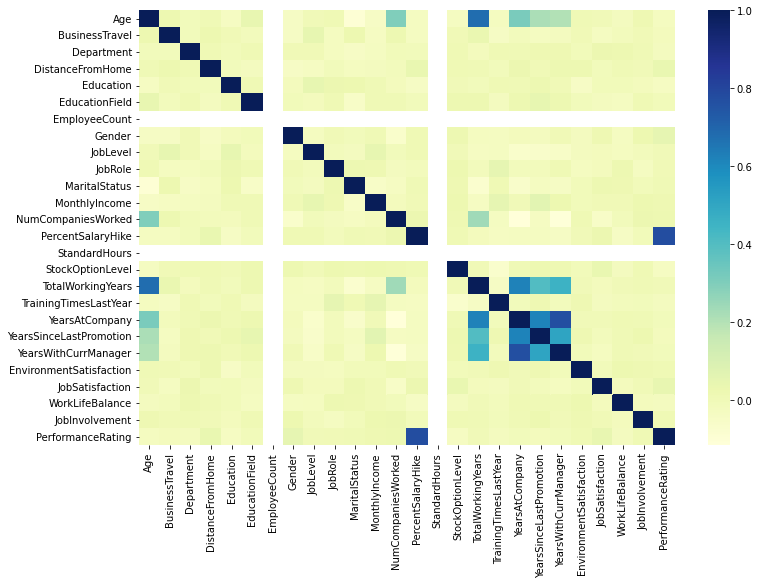

In [ ]:
fig ,ax = plt.subplots(1,1,figsize=(12,8))
sns.heatmap(X.corr() , cmap="YlGnBu",ax = ax)
plt.savefig("/content/drive/MyDrive/fig.jpeg")

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(X , y , test_size= 0.2, random_state=0) 

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression , LinearRegression


In [ ]:
clf_log = LogisticRegression().fit(X_train ,y_train.values.ravel()) 

In [ ]:
y_predict = clf_log.predict_proba(X_test)

In [ ]:
final_ans = []
for arr in y_predict :
  if arr[0] >=0.5 :
    final_ans.append(0) 
  else :
    final_ans.append(1)  

In [ ]:
accuracy_score(y_test , final_ans)

0.8401360544217688

TREES

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
clf_dt = DecisionTreeRegressor(max_depth = 7).fit(X_train ,y_train)

In [ ]:
dt_predict = clf_dt.predict(X_test)

In [ ]:
final_ans = []
for arr in dt_predict :
  if arr >=0.5 :
    final_ans.append(1) 
  else :
    final_ans.append(0)  

In [ ]:
accuracy_score(y_test , final_ans)

0.8605442176870748

In [ ]:
# use grid search to get best on accuracy

Ensemble

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
clf_rf = RandomForestRegressor().fit(X_train , y_train.values.ravel())

In [ ]:
rf_predict = clf_rf.predict(X_test)
final_ans = []
for arr in rf_predict :
  if arr >=0.5 :
    final_ans.append(1) 
  else :
    final_ans.append(0)  

In [ ]:
accuracy_score(y_test , final_ans)

0.9909297052154195

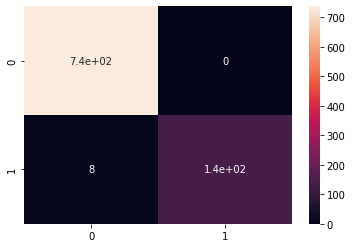

In [ ]:
sns.heatmap(confusion_matrix(y_test, final_ans) ,annot = True)

In [ ]:
confusion_matrix(y_test, final_ans)

array([[737,   0],
       [  8, 137]])

In [ ]:
mean_absolute_error(y_test ,rf_predict)

0.06311791383219954

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
clf_gbr = RandomForestRegressor().fit(X_train , y_train.values.ravel())

In [ ]:
gbr_predict = clf_gbr.predict(X_test)

In [ ]:
final_ans = []
for arr in gbr_predict :
  if arr >=0.5 :
    final_ans.append(1) 
  else :
    final_ans.append(0)  

In [ ]:
accuracy_score(y_test , final_ans)

0.9909297052154195

In [ ]:
mean_absolute_error(y_test ,gbr_predict)

0.05911564625850341

In [ ]:

mean_absolute_error(y_test ,rf_predict)

0.06311791383219954

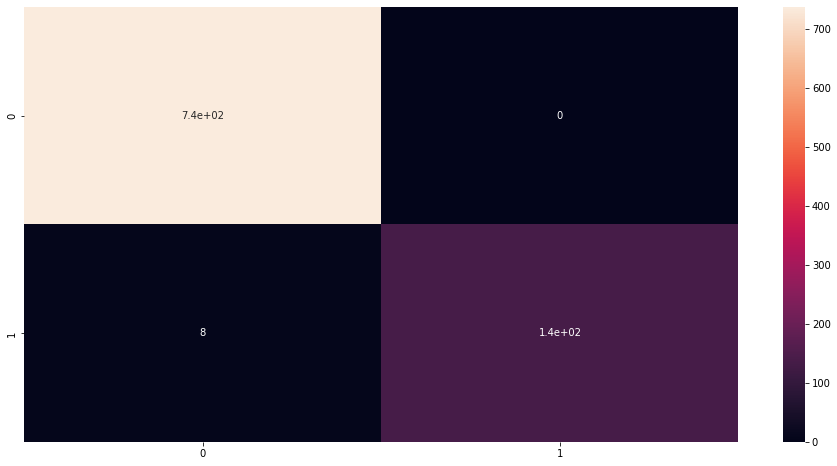

In [ ]:
fig ,ax = plt.subplots(1,1 , figsize=(16,8))
sns.heatmap(confusion_matrix(y_test, final_ans) ,annot = True , ax= ax)


In [ ]:
confusion_matrix(y_test, final_ans)

array([[737,   0],
       [  8, 137]])

Random forest better

In [ ]:
#gridvalues = {
 #   "n_estimators" :np.arange(100,400,50) ,
  #  "criterion" : ["squared_error"] ,
   # "max_depth" : [None , 3,5,10] ,
    #"max_features" : ["auto" ,"sqrt","log2"]

#}
#clf = GridSearchCV(RandomForestRegressor() , param_grid = gridvalues ,scoring="neg_mean_squared_error"  )
#clf.fit(X_train , y_train.values.ravel())

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': feature,
    'Importance': clf_gbr.feature_importances_
})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

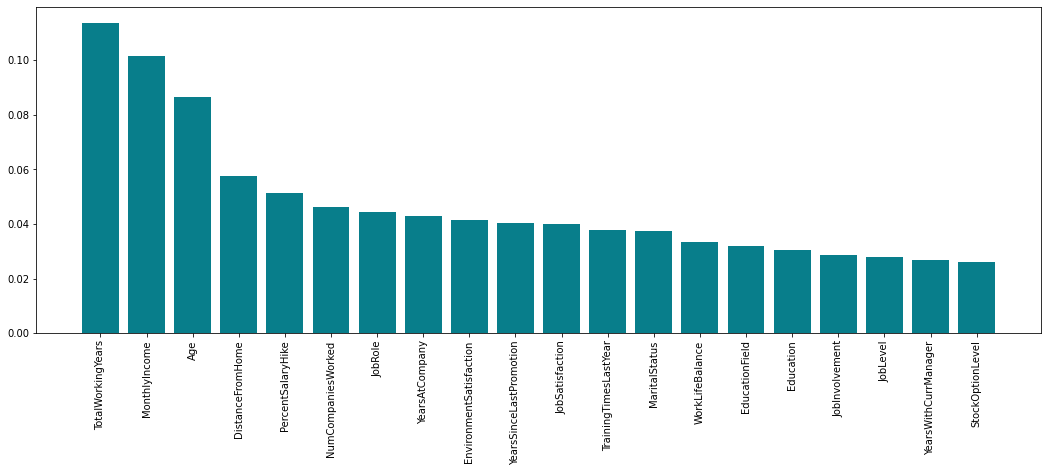

In [ ]:
importances = importances.sort_values(by='Importance', ascending=False)
fig ,ax = plt.subplots(1,1 ,figsize=(18,6))
ax.bar(x=importances['Attribute'][:20], height=importances['Importance'][:20], color='#087E8B')
plt.xticks(rotation=90)


In [ ]:
sum(importances[:5]["Importance"])

0.41839935920890936

In [ ]:
importances[:5]

,Attribute,Importance
16,TotalWorkingYears,0.109326
11,MonthlyIncome,0.105996
0,Age,0.090561
3,DistanceFromHome,0.060270
13,PercentSalaryHike,0.052246
